In [106]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import torch as nn
import torch.functional as F

In [107]:
# The labels contains 
# Params : x, y = coordinates
#           width, height = specifiy the rectangle box dimension
#           rotation = the rotation degree of the rectnagle box
#           rectanglelabels = the label of the box 
#           original-width, original-height = the dimension of the whole image

#Let's see an example : 
# >>df = pd.read_csv('/content/1-7.csv')
# >>df['label'][0]
#output: [{"x": 54.531249999999986, "y": 52.5, "width": 40.781249999999986, "height": 44.374999999999986, "rotation": 0, "rectanglelabels": ["25"], "original_width": 640, "original_height": 480}]
#
#
#

In [108]:
df = pd.read_csv('/content/1-7.csv')

In [109]:
df['label'][0]

'[{"x": 54.531249999999986, "y": 52.5, "width": 40.781249999999986, "height": 44.374999999999986, "rotation": 0, "rectanglelabels": ["25"], "original_width": 640, "original_height": 480}]'

In [110]:
import json 
js = json.loads(df['label'][10])[0]

In [111]:
compute_x_y_min_max(js.get('x'),js.get('y'),js.get('width'),js.get('height'),js.get('rotation'))

{'x_min': 40,
 'y_min': 0,
 'x_max': 95.93750000000003,
 'y_max': 51.45833145247552,
 'width': 55.93750000000002,
 'height': 51.45833145247552}

In [112]:
import math
def compute_x_y_min_max(x_min:float,y_min:float,width:float,height:float,rotation:float,class_label:int)->dict:
  x_max = x_min+np.cos(np.deg2rad(rotation))*width-np.cos(np.deg2rad(90-rotation))*height
  y_max = y_min+np.sin(np.deg2rad(rotation))*(width)+np.sin(np.deg2rad(90-rotation))*(height)
  return {'x_min':x_min,'y_min':y_min,'x_max':x_max,'y_max':y_max,'width':width,'height':height,'class':class_label}

In [133]:
import json
def extract_model_features(image_meta_data:object)->dict:
  
  #Make ready the image path for loading from disk
  file_name = image_meta_data.image.split('/')[-1].split('-')[1:]
  file_name[2] = str(int(file_name[2])) # Remove the post-zeros of the frame number
  file_name[4] = file_name[4].lower()    # if M then make it lower case (m)
  file_name = ''.join([e+'_' for e in file_name])
  file_name = file_name[:-1]

  #Make ready the label box infos for modle
  label = json.loads(image_meta_data['label'] ) #Conver the string to the json file for better operations
  labels = [] 
  for i in label:
    labels.append(compute_x_y_min_max(i.get('x'),i.get('y'),i.get('width'),i.get('height'),i.get('rotation'),i.get('rectanglelabels')))

  return {'image_name':file_name,'labels':labels}

In [205]:
def creating_dataframe(df:object)->object:
  column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax'] 
  data = pd.DataFrame(columns=column_name)
  counter = 0
  for i in df.iloc:
    meta_data = extract_model_features(i)

    for label in meta_data.get('labels'):
      # print(label.get('class'))
      # print(label.get('width'))
      new_label_class = (int(label.get('class')[0])%8)
      # print(meta_data.get('image_name'))
      values = [[meta_data.get('image_name'),label.get('width'),label.get('height'),new_label_class,label.get('x_min'),label.get('y_min'),label.get('x_max'),label.get('y_max')]]
      row = (pd.DataFrame(values,columns=column_name))
      data = data.append(row)
  return data    

In [206]:
data = creating_dataframe(df)

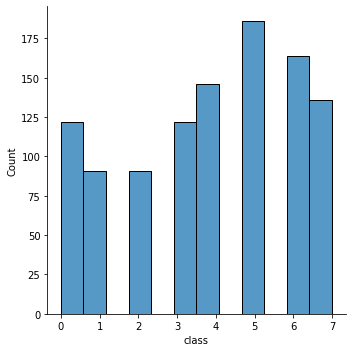

In [216]:
sns.displot(data['class'])

In [121]:
|for i in df.iloc:
  print(i.image)

/data/upload/6/e46f48d2-6-upper-00000218-f-M-25-25.jpg
/data/upload/6/d7431c22-6-upper-00000163-f-M-23-23.jpg
/data/upload/6/36a16c79-6-lower-00000616-f-M-6-6.jpg
/data/upload/6/ce6ffeae-5-upper-00002090-b-M-30-32.jpg
/data/upload/6/55859dbd-4-upper-00002933-t-M-30-31.jpg
/data/upload/6/695634c4-4-upper-00002196-b-M-26-26.jpg
/data/upload/6/77c58664-4-upper-00002033-f-M-26-27.jpg
/data/upload/6/97a079ae-4-upper-00001022-t-M-22-23.jpg
/data/upload/6/e2ef135a-3-upper-00000677-t-M-23-24.jpg
/data/upload/6/45802494-3-upper-00000719-b-M-23-24.jpg
/data/upload/6/28fa86cd-2-upper-00001103-b-M-26-27.jpg
/data/upload/6/8306ffc3-2-upper-00000429-b-M-23-23.jpg
/data/upload/6/a7aa17d9-2-upper-00000427-b-M-23-24.jpg
/data/upload/6/1de20692-2-lower-00001463-b-M-12-11.jpg
/data/upload/6/a468a17f-1-upper-00000185-b-M-21-21.jpg
/data/upload/6/34fe1079-1-lower-00000493-t-M-6-8.jpg
/data/upload/6/8d6337e9-7-upper-00004174-b-M-31-32.jpg
/data/upload/6/4acf2e93-7-upper-00004007-b-M-33-34.jpg
/data/upload/6

In [ ]:
file_name

['6', 'upper', '218', 'f', 'm', '25', '25.jpg']

In [ ]:
file_name

'6_upper_218_f_m_25_25.jpg'